In [ ]:
#Generation of X4 training dataset

from dataset import generate_training_data

generate_training_data("datasets/train/train_sharp_bicubic/X4", "datasets/resized/", scale=4)
generate_training_data("datasets/train/train_blur_bicubic/X4", "datasets/resized/", scale=4)
generate_training_data("datasets/train/train_sharp/", "datasets/sr_resized_X4/", scale=4)
generate_training_data("datasets/train/train_blur/", "datasets/sr_resized_X4/", scale=4)

In [4]:
#Generation of X2 training dataset

from dataset import generate_training_data

generate_training_data("datasets/train/train_sharp_bicubic/X4", "datasets/sr_resized_X2/", scale=2)
generate_training_data("datasets/train/train_blur_bicubic/X4", "datasets/sr_resized_X2/", scale=2)

In [ ]:
#Generation of validation datasets

from dataset import generate_validation_set

generate_validation_set("datasets/val/val_sharp_bicubic/X4", "datasets/val_resized/", "datasets/val/val_sharp/", "datasets/val_sr_resized_X4/", scale=4)
generate_training_data("datasets/val/val_sharp_bicubic/X4", "datasets/val_resized_X2/", scale=2)

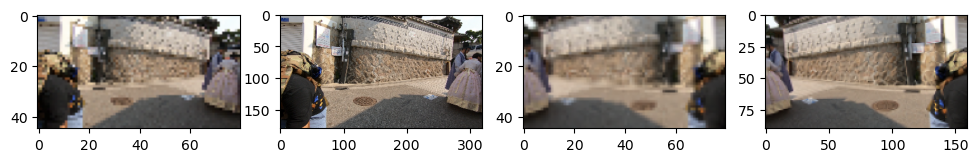

In [3]:
#Data augmentation
import numpy as np
import os
from preprocessing import augment_data
import matplotlib.pyplot as plt

for frame_X, frame_Y in zip(sorted(os.listdir("datasets/resized/")), sorted(os.listdir("datasets/sr_resized_X4/"))):
    if (frame_X == "aug_X4" or frame_X == "aug_X2"): break
    lr4, hr4 = augment_data(os.path.join("datasets/resized/", frame_X), os.path.join("datasets/sr_resized_X4/", frame_Y))

    if(not os.path.exists("datasets/resized/aug_X4/")):
        os.makedirs("datasets/resized/aug_X4/")
    if(not os.path.exists("datasets/sr_resized/aug_X4/")):
        os.makedirs("datasets/sr_resized_X4/aug_X4/")

    plt.imsave(f"datasets/resized/aug_X4/{frame_X}", lr4)
    plt.imsave(f"datasets/sr_resized_X4/aug_X4/{frame_Y}", hr4)

for frame_X, frame_Y in zip(sorted(os.listdir("datasets/resized/")), sorted(os.listdir("datasets/sr_resized_X2/"))):
    if (frame_X == "aug_X4" or frame_X == "aug_X2"): break
    lr2, hr2 = augment_data(os.path.join("datasets/resized/", frame_X), os.path.join("datasets/sr_resized_X2/", frame_Y))

    if(not os.path.exists("datasets/resized/aug_X4/")):
        os.makedirs("datasets/resized/aug_X2/")
    if(not os.path.exists("datasets/sr_resized_X2/aug_X4/")):
        os.makedirs("datasets/sr_resized_X2/aug_X2/")

    plt.imsave(f"datasets/resized/aug_X2/{frame_X}", lr2)
    plt.imsave(f"datasets/sr_resized_X2/aug_X2/{frame_Y}", hr2)


fig, axs = plt.subplots(1, 4, figsize=(12, 8))
axs[0].imshow(lr4)
axs[1].imshow(hr4)
axs[2].imshow(lr2)
axs[3].imshow(hr2)
plt.show()



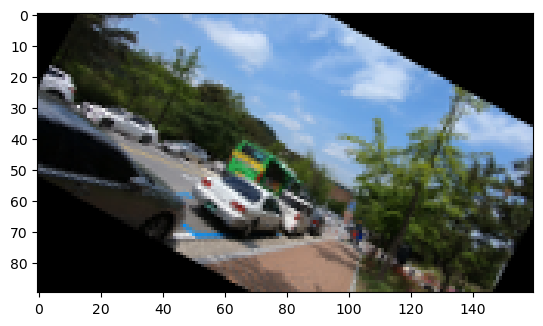

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("datasets/sr_resized_X2/aug_X2/6.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [1]:
#Generate h5 files
from dataset import training_data, val_data

training_data("datasets/resized/aug_X2/", "datasets/sr_resized_X2/aug_X2/", "datasets/h5/train_X2.h5")
val_data("datasets/val_resized/", "datasets/val_resized_X2/", "datasets/h5/val_X2.h5")

training_data("datasets/resized/aug_X4/", "datasets/sr_resized_X4/aug_X4/", "datasets/h5/train_X4.h5")
val_data("datasets/val_resized/", "datasets/val_sr_resized_X4/", "datasets/h5/val_X4.h5")

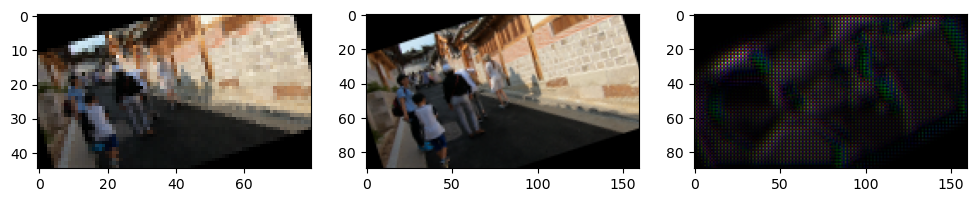

In [31]:
import numpy as np
import matplotlib.pyplot as plt

lr = np.load("lr.npy")
hr = np.load("hr.npy")
sr = np.load("sr.npy")

fig, axs = plt.subplots(1, 3, figsize=(12, 8))
axs[0].imshow(lr)
axs[1].imshow(hr)
axs[2].imshow(sr)
plt.show()
